### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

from utils import COLORS_DICT, get_colors, lists_intersection
from dataset import Dataset
from model import Regressor, Predictor
from plotting import Plotter

### Configs

In [2]:
data_path = './data'
plots_path = './plots'

feature_names = {'Alaska': ['inflation', 'unemployment', 'gdp_per_capita_rate', 'payment_in_minimum_wage'],
                 'Brazil': ['inflation', 'unemployment', 'gdp_per_capita_rate', 'payment_in_minimum_wage'],
                 'Russia': ['inflation', 'unemployment', 'gdp_per_capita_rate']}
target_name = 'poverty'

## Data

In [3]:
plotter = Plotter(data_path=data_path, plots_path=plots_path)

In [4]:
dataset = Dataset(data_path=data_path,
                  features_transform=PolynomialFeatures(degree=2, include_bias=False))

In [5]:
data = {}
for region in os.listdir(data_path):
    features_table, target_table = dataset.get_data(region=region,
                                                    feature_names=feature_names[region].copy(),
                                                    target_name=target_name)
    
    data.update({region: {'features': features_table, 'target': target_table}})

### Data Distribution

In [6]:
def plot_distribution(plotting_regions, save=False):
    plotting_features = [target_name, 'region'] + lists_intersection([feature_names[region]
                                                                      for region in plotting_regions])
    plotting_data = pd.concat([pd.concat([data[region]['target'], data[region]['features']], axis=1).assign(region=region)
                               for region in plotting_regions])[plotting_features]

    plotter.plot_data_distribution(plotting_data,
                                   regions=plotting_regions,
                                   colors=get_colors(COLORS_DICT, color_names=plotting_regions),
                                   save=save)

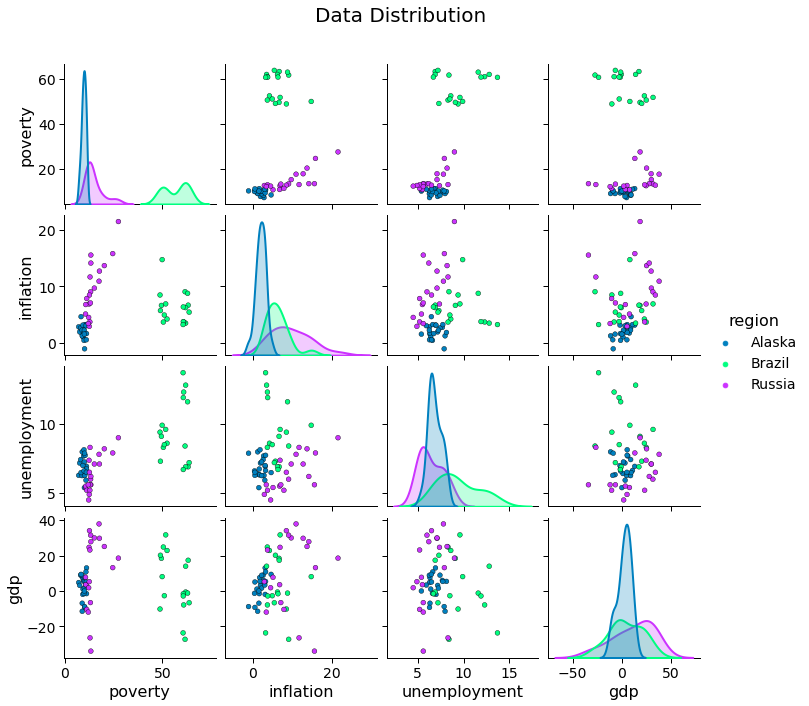

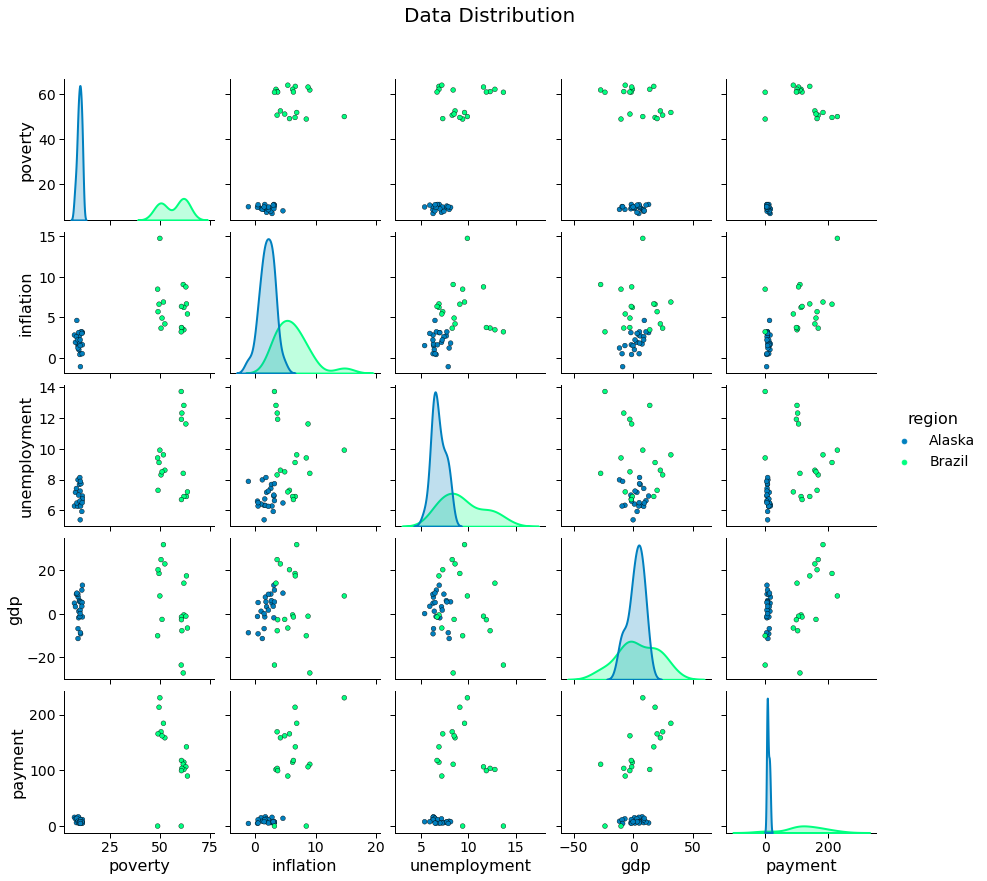

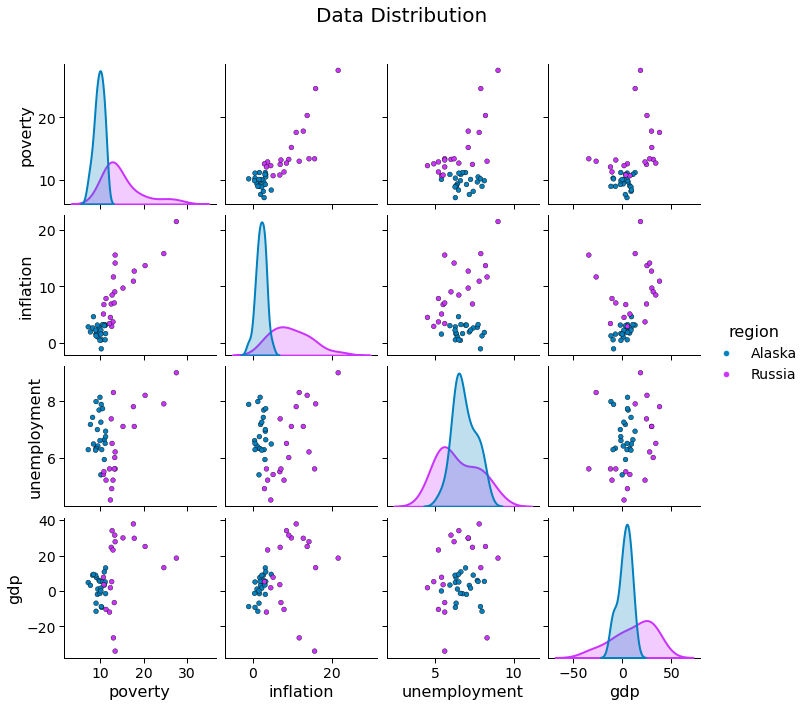

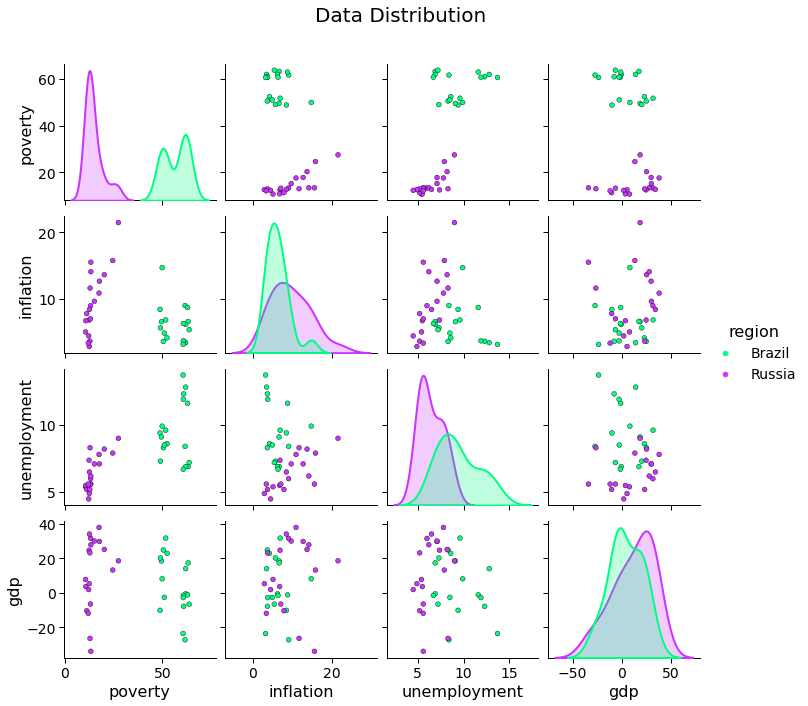

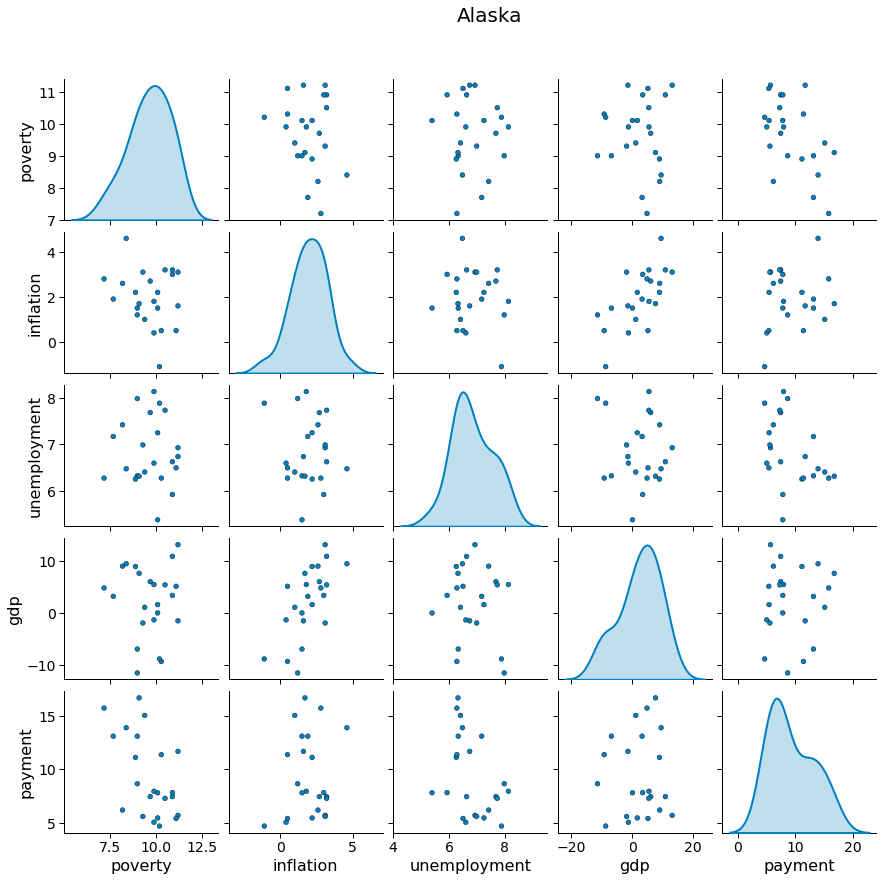

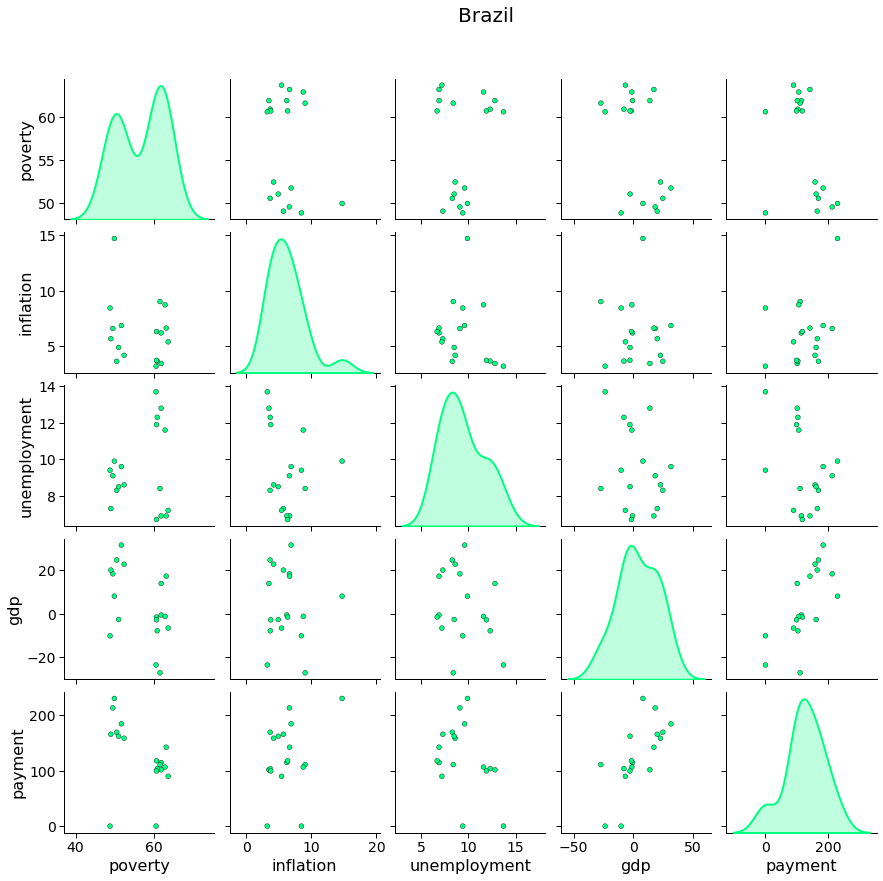

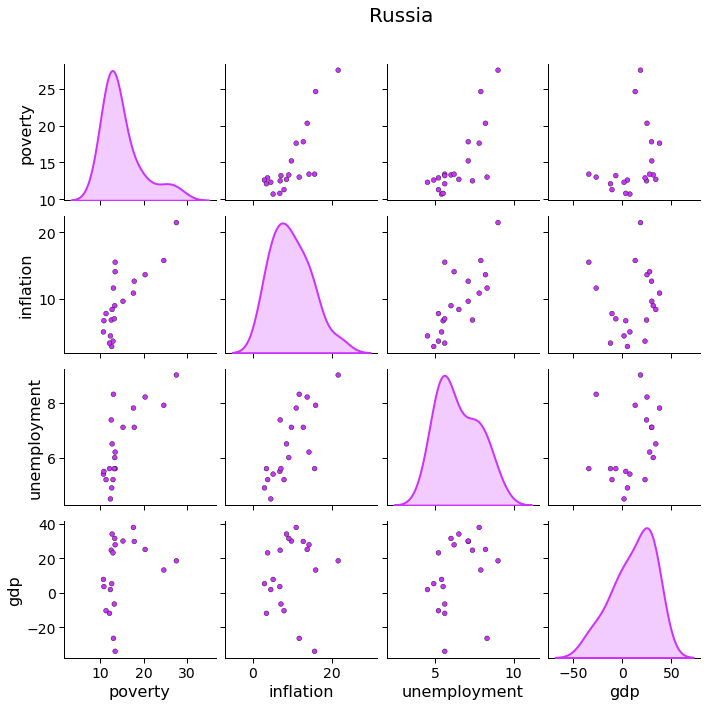

In [7]:
plot_distribution(plotting_regions=['Alaska', 'Brazil', 'Russia'], save=False)
plot_distribution(plotting_regions=['Alaska', 'Brazil'], save=False)
plot_distribution(plotting_regions=['Alaska', 'Russia'], save=False)
plot_distribution(plotting_regions=['Brazil', 'Russia'], save=False)
plot_distribution(plotting_regions=['Alaska'], save=False)
plot_distribution(plotting_regions=['Brazil'], save=False)
plot_distribution(plotting_regions=['Russia'], save=False)

## Model

In [8]:
regressors = {}

### Alaska

In [9]:
region = 'Alaska'

In [10]:
regressor = Regressor(model=Lasso(fit_intercept=True,
                                  max_iter=2000, tol=1e-2,
                                  random_state=42),
                      scorer=lambda y_true, y_pred: -mean_absolute_error(y_true, y_pred))

parameters_grid = {'alpha': np.logspace(-2, 0, 3)}

regressor.grid_search(parameters_grid=parameters_grid,
                      features=data[region]['features'],
                      target=data[region]['target'])

regressors[region] = regressor

print(f'MAE: {abs(regressor.best_score)}')
print(f'Best Parameters: {regressor.best_parameters}')
print('-----------------------')
for feature_name, coefficient in zip(regressor.model.feature_names_in_, regressor.model.coef_):
    print(f'{feature_name}: {coefficient}')
print('-----------------------')

MAE: 0.5288060170153939
Best Parameters: {'alpha': 0.01}
-----------------------
inflation: -0.0
unemployment: -0.0
gdp_per_capita_rate: 0.0
payment_in_minimum_wage: -0.0
inflation^2: -0.0
inflation unemployment: -0.0
inflation gdp_per_capita_rate: 0.0
inflation payment_in_minimum_wage: -0.0170958094932253
unemployment^2: -0.018486157936869054
unemployment gdp_per_capita_rate: 0.00566022625898476
unemployment payment_in_minimum_wage: -0.0
gdp_per_capita_rate^2: 0.0009446041494154599
gdp_per_capita_rate payment_in_minimum_wage: -0.0030446347258895404
payment_in_minimum_wage^2: -0.006253746794622437
-----------------------


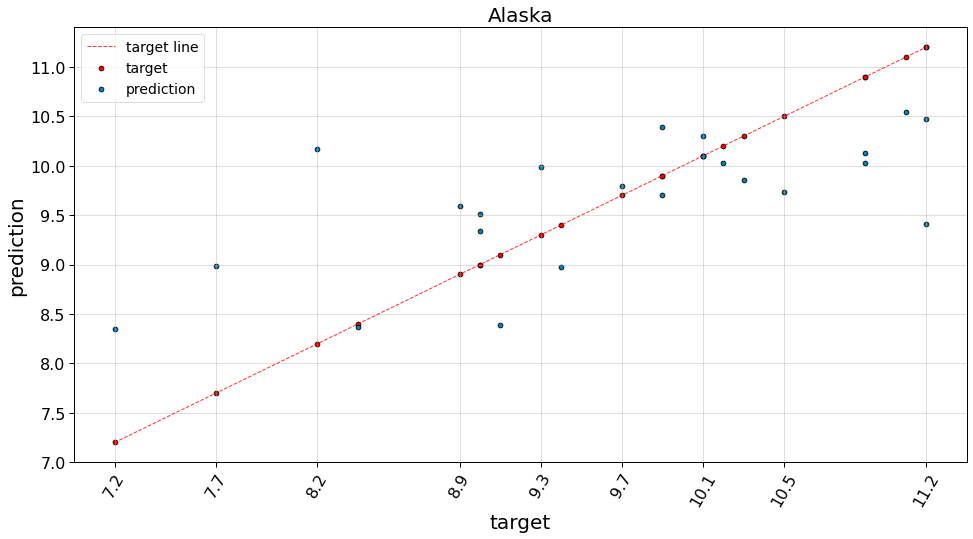

In [11]:
plotter.plot_prediction(region=region,
                        prediction=regressor.predict(data[region]['features']),
                        target=data[region]['target'],
                        color=get_colors(COLORS_DICT, color_names=[region]),
                        save=False)

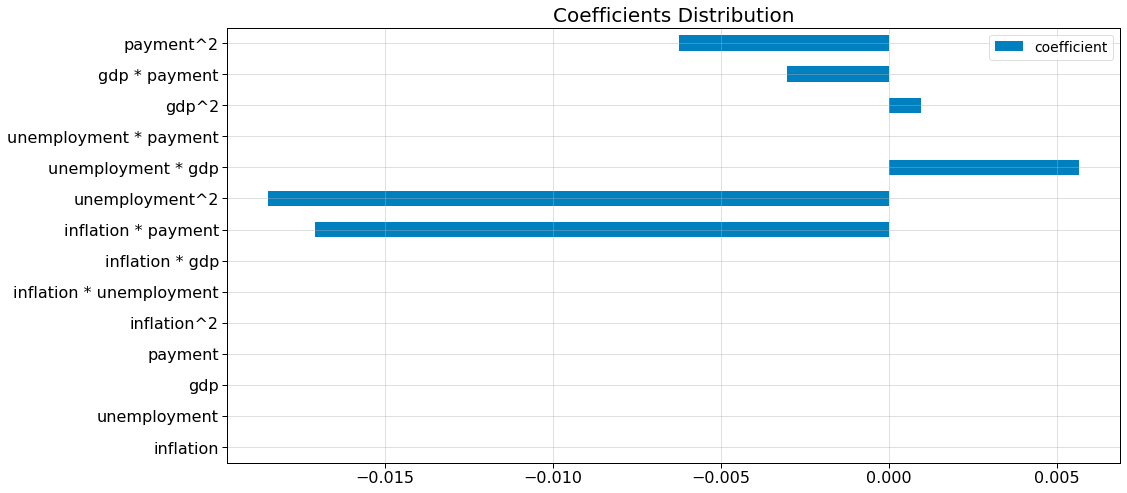

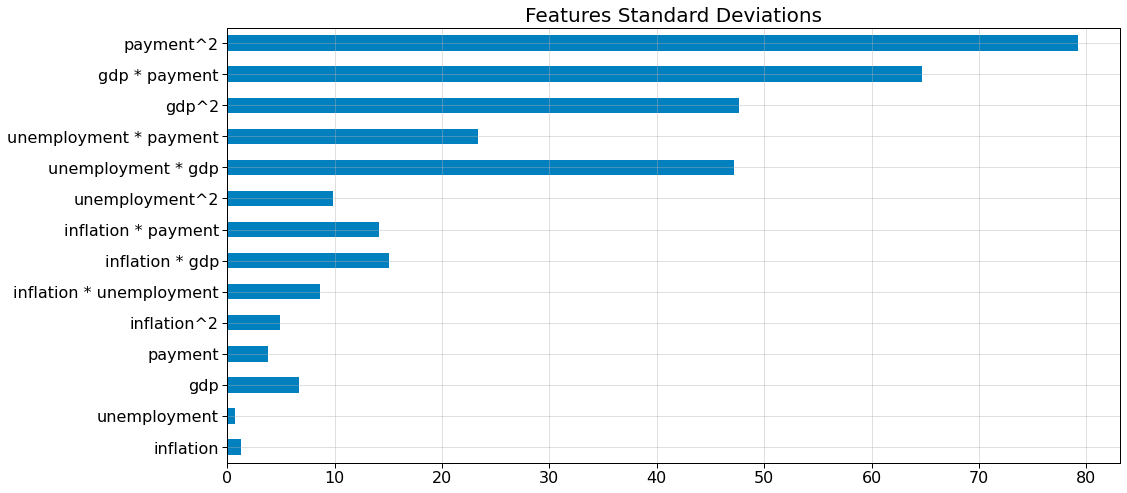

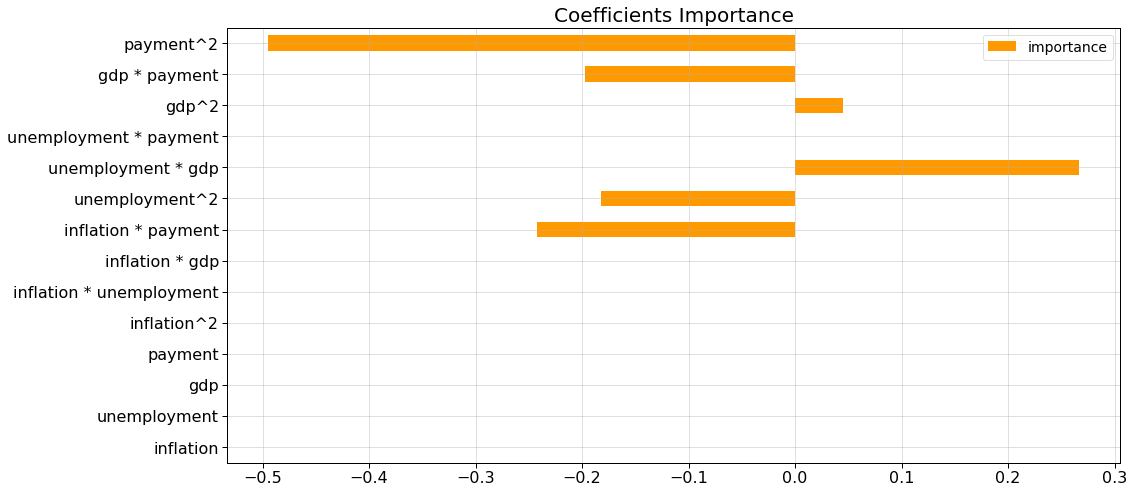

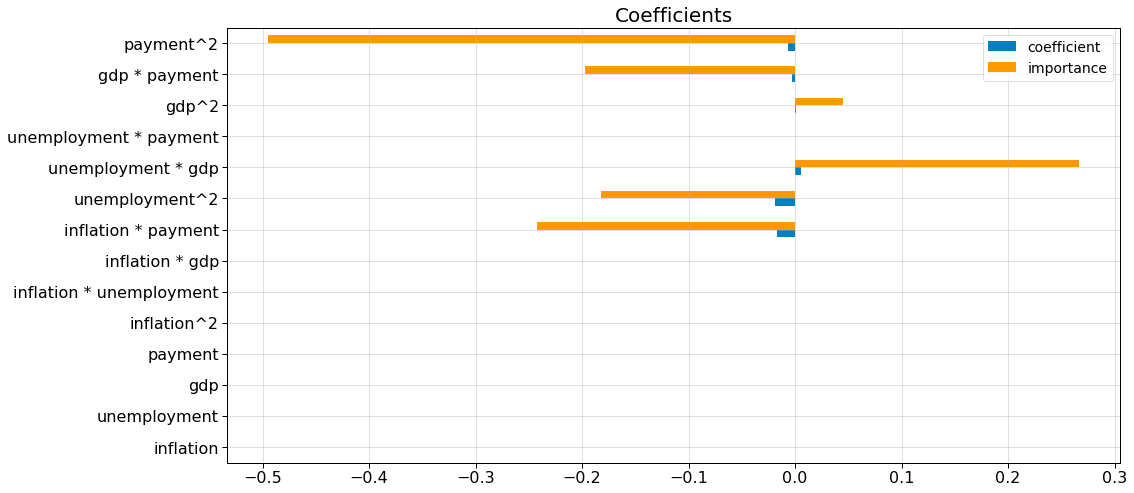

In [12]:
plotter.plot_coefficients_distribution(region=region,
                                       regressor=regressor,
                                       color=get_colors(COLORS_DICT, color_names=[region]),
                                       save=False)

plotter.plot_features_std(region=region,
                          features_table=data[region]['features'],
                          color=get_colors(COLORS_DICT, color_names=[region]),
                          save=False)

plotter.plot_coefficients_importance(region=region,
                                     regressor=regressor,
                                     features_table=data[region]['features'],
                                     color=get_colors(COLORS_DICT, color_names=['None']),
                                     save=False)

plotter.plot_coefficients(region=region,
                          regressor=regressor,
                          features_table=data[region]['features'],
                          color=get_colors(COLORS_DICT, color_names=[region, 'None']),
                          save=False)

### Brazil

In [13]:
region = 'Brazil'

In [14]:
regressor = Regressor(model=Lasso(fit_intercept=True,
                                  max_iter=2000, tol=1e-2,
                                  random_state=42),
                      scorer=lambda y_true, y_pred: -mean_absolute_error(y_true, y_pred))

parameters_grid = {'alpha': np.logspace(0, 2, 3)}

regressor.grid_search(parameters_grid=parameters_grid,
                      features=data[region]['features'],
                      target=data[region]['target'])

regressors[region] = regressor

print(f'MAE: {abs(regressor.best_score)}')
print(f'Best Parameters: {regressor.best_parameters}')
print('-----------------------')
for feature_name, coefficient in zip(regressor.model.feature_names_in_, regressor.model.coef_):
    print(f'{feature_name}: {coefficient}')
print('-----------------------')

MAE: 1.282602282617341
Best Parameters: {'alpha': 1.0}
-----------------------
inflation: -0.0
unemployment: -0.0
gdp_per_capita_rate: 0.0
payment_in_minimum_wage: 0.0
inflation^2: -0.0
inflation unemployment: -0.0
inflation gdp_per_capita_rate: 0.0
inflation payment_in_minimum_wage: 0.0031292667285495405
unemployment^2: -0.0
unemployment gdp_per_capita_rate: 0.0
unemployment payment_in_minimum_wage: 0.005227234277802313
gdp_per_capita_rate^2: 0.0
gdp_per_capita_rate payment_in_minimum_wage: -0.00028014917729189453
payment_in_minimum_wage^2: -0.0005508398826220425
-----------------------


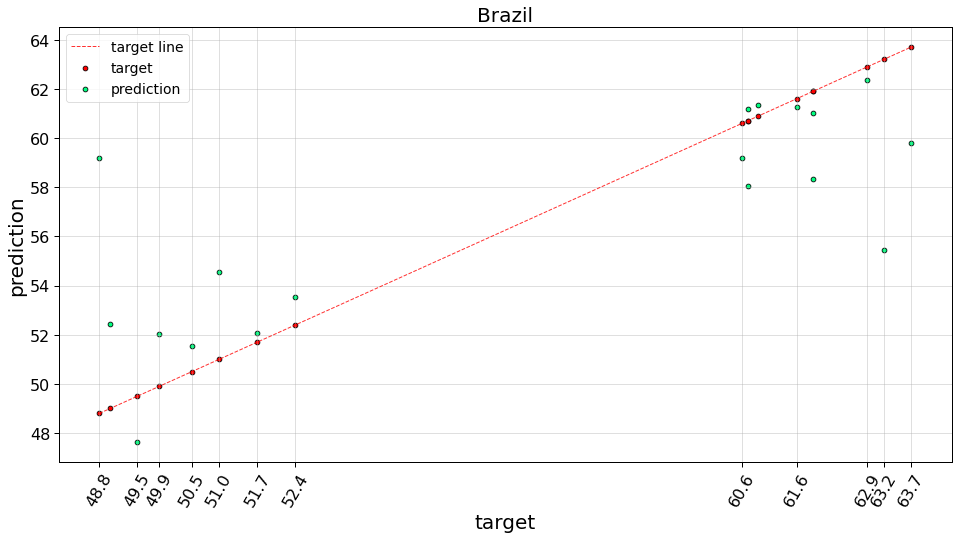

In [15]:
plotter.plot_prediction(region=region,
                        prediction=regressor.predict(data[region]['features']),
                        target=data[region]['target'],
                        color=get_colors(COLORS_DICT, color_names=[region]),
                        save=False)

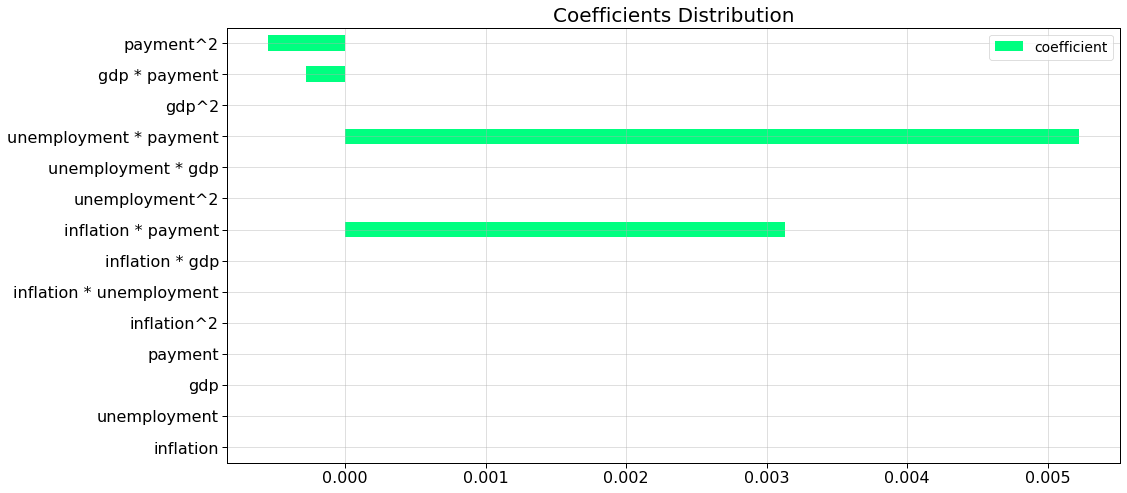

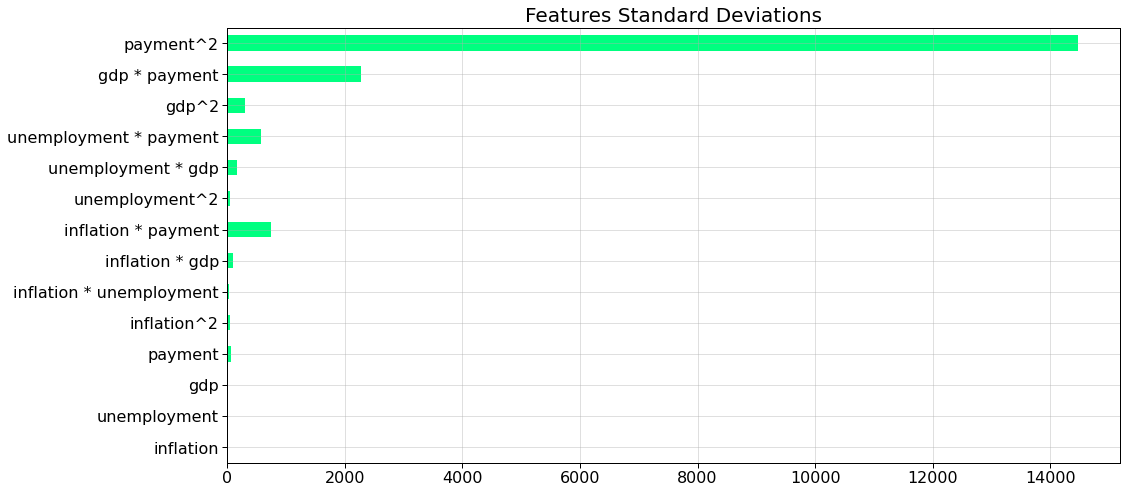

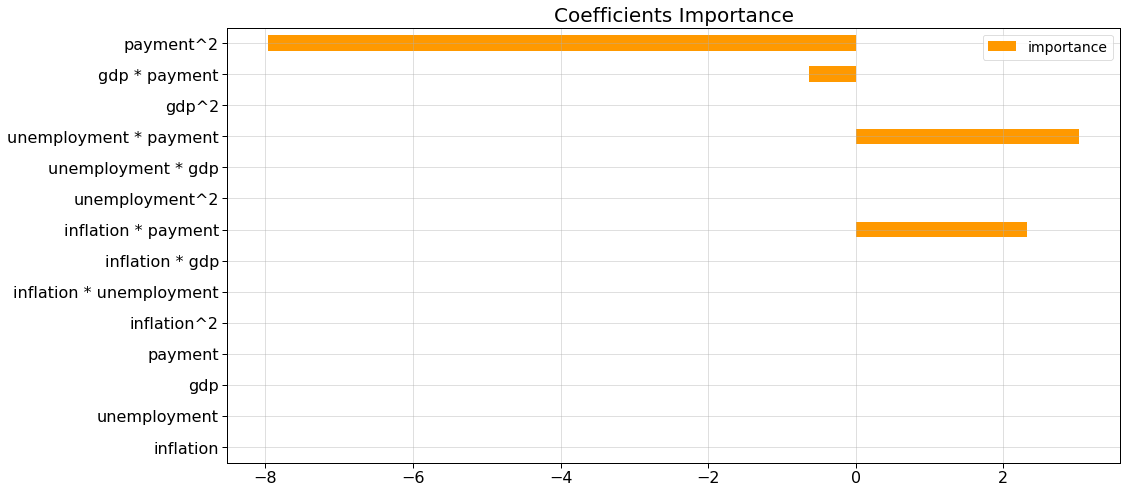

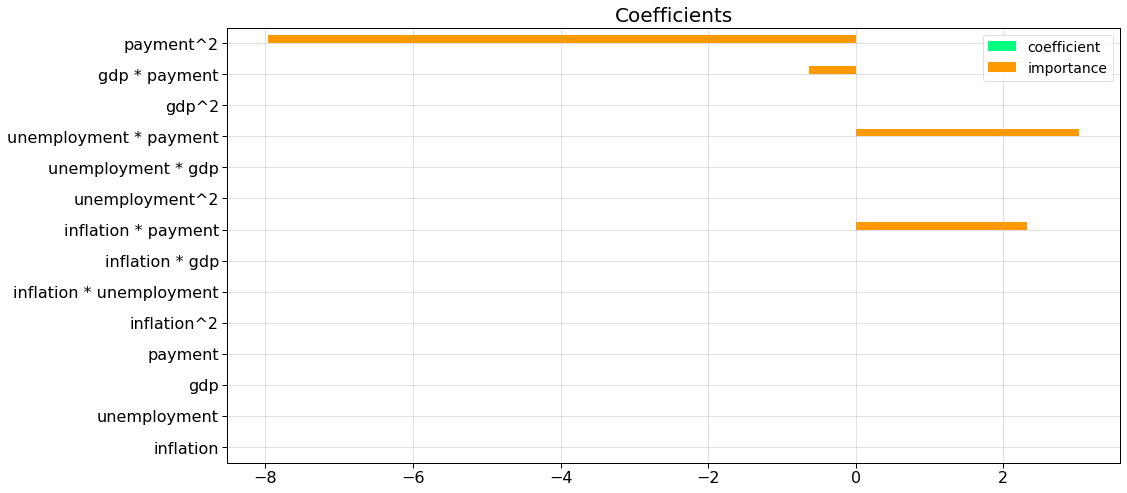

In [16]:
plotter.plot_coefficients_distribution(region=region,
                                       regressor=regressor,
                                       color=get_colors(COLORS_DICT, color_names=[region]),
                                       save=False)

plotter.plot_features_std(region=region,
                          features_table=data[region]['features'],
                          color=get_colors(COLORS_DICT, color_names=[region]),
                          save=False)

plotter.plot_coefficients_importance(region=region,
                                     regressor=regressor,
                                     features_table=data[region]['features'],
                                     color=get_colors(COLORS_DICT, color_names=['None']),
                                     save=False)

plotter.plot_coefficients(region=region,
                          regressor=regressor,
                          features_table=data[region]['features'],
                          color=get_colors(COLORS_DICT, color_names=[region, 'None']),
                          save=False)

### Russia

In [17]:
region = 'Russia'

In [18]:
regressor = Regressor(model=Lasso(fit_intercept=True,
                                  max_iter=2000, tol=1e-2,
                                  random_state=42),
                      scorer=lambda y_true, y_pred: -mean_absolute_error(y_true, y_pred))

parameters_grid = {'alpha': np.logspace(-1, 2, 4)}

regressor.grid_search(parameters_grid=parameters_grid,
                      features=data[region]['features'],
                      target=data[region]['target'])

regressors[region] = regressor

print(f'MAE: {abs(regressor.best_score)}')
print(f'Best Parameters: {regressor.best_parameters}')
print('-----------------------')
for feature_name, coefficient in zip(regressor.model.feature_names_in_, regressor.model.coef_):
    print(f'{feature_name}: {coefficient}')
print('-----------------------')

MAE: 1.0702999004634972
Best Parameters: {'alpha': 0.1}
-----------------------
inflation: 0.0
unemployment: 0.0
gdp_per_capita_rate: 0.0
inflation^2: 0.023425578976043266
inflation unemployment: 0.0
inflation gdp_per_capita_rate: 0.004956459711561281
unemployment^2: 0.0
unemployment gdp_per_capita_rate: 0.0
gdp_per_capita_rate^2: -0.0004781811633403745
-----------------------


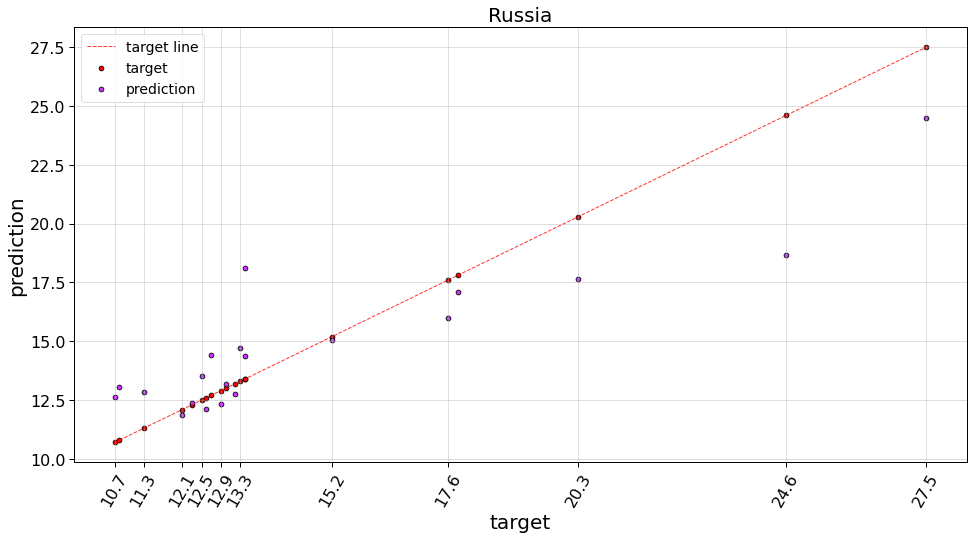

In [19]:
plotter.plot_prediction(region=region,
                        prediction=regressor.predict(data[region]['features']),
                        target=data[region]['target'],
                        color=get_colors(COLORS_DICT, color_names=[region]),
                        save=False)

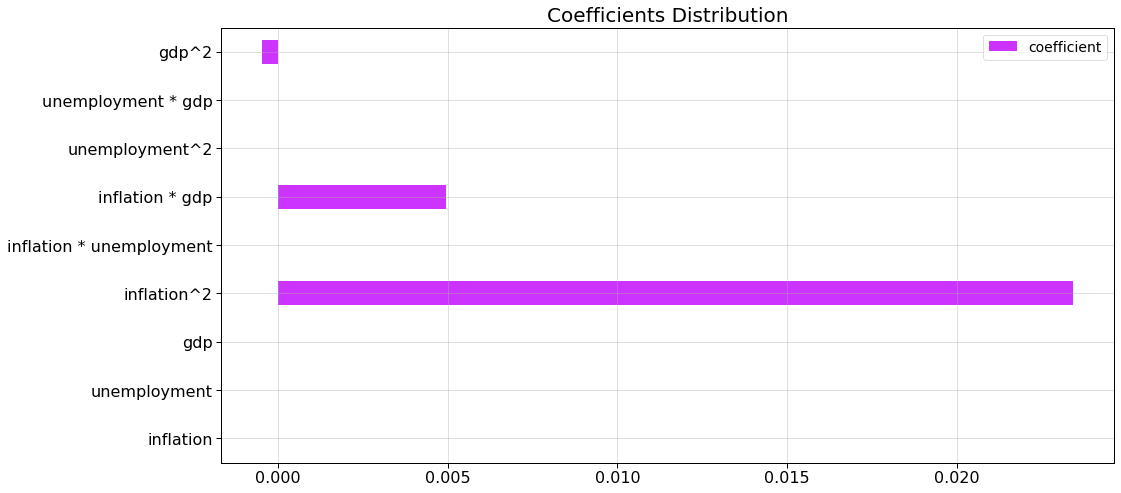

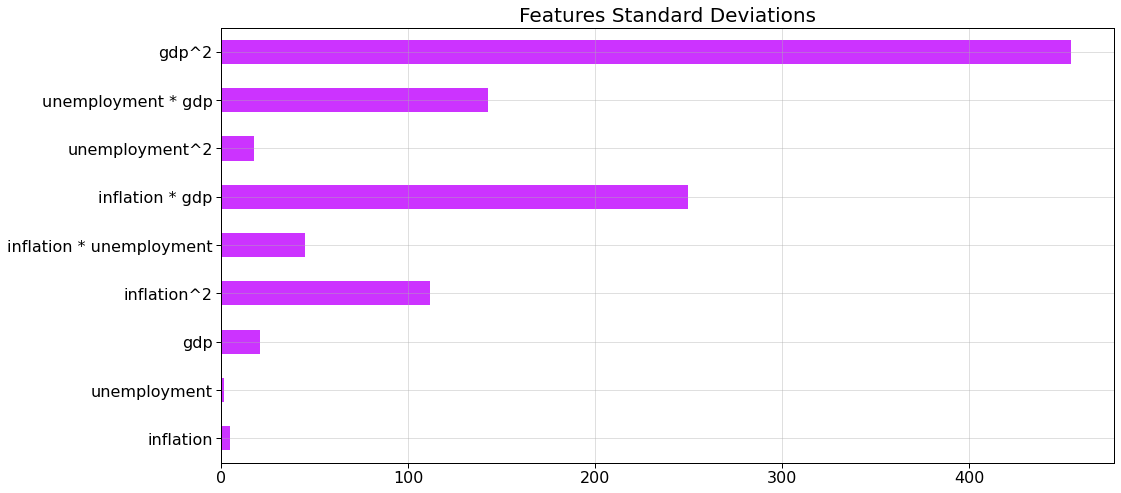

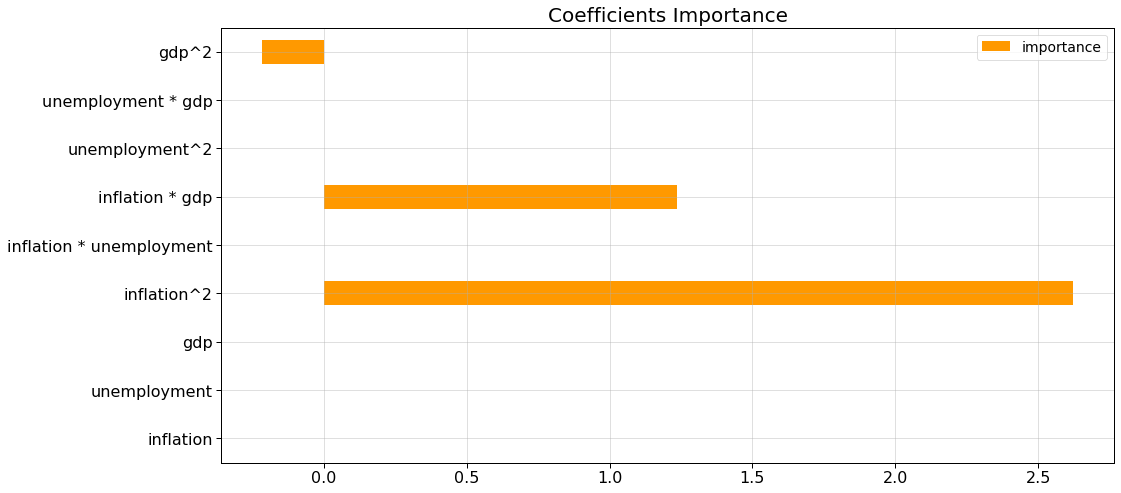

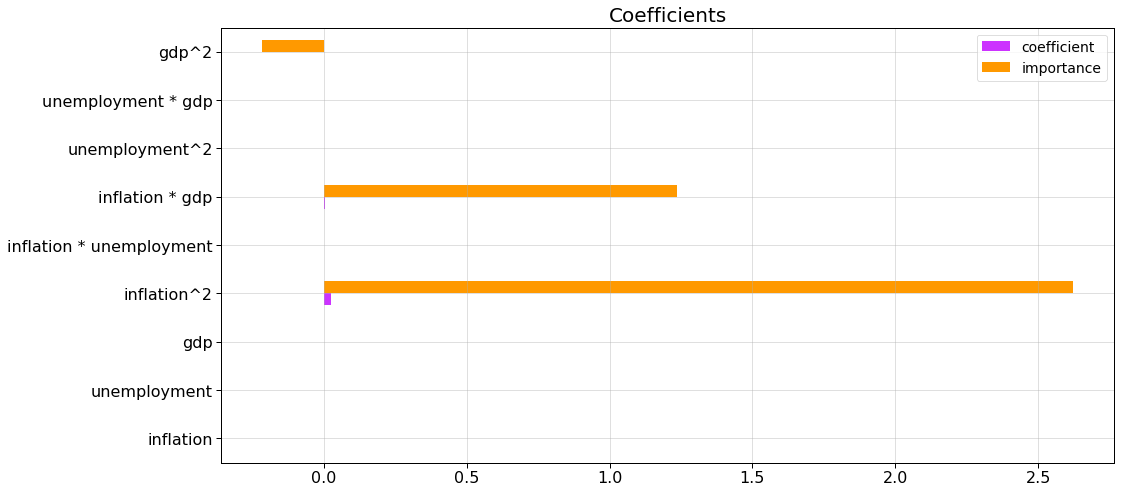

In [20]:
plotter.plot_coefficients_distribution(region=region,
                                       regressor=regressor,
                                       color=get_colors(COLORS_DICT, color_names=[region]),
                                       save=False)

plotter.plot_features_std(region=region,
                          features_table=data[region]['features'],
                          color=get_colors(COLORS_DICT, color_names=[region]),
                          save=False)

plotter.plot_coefficients_importance(region=region,
                                     regressor=regressor,
                                     features_table=data[region]['features'],
                                     color=get_colors(COLORS_DICT, color_names=['None']),
                                     save=False)

plotter.plot_coefficients(region=region,
                          regressor=regressor,
                          features_table=data[region]['features'],
                          color=get_colors(COLORS_DICT, color_names=[region, 'None']),
                          save=False)

## UBI Implementation Effect Prediction in Russia

In [21]:
for region in regressors.keys():
    predictor = Predictor(regressor=regressors[region])
    mae = mean_absolute_error(predictor.predict(features_table=data['Russia']['features'],
                              payment_in_minimum_wage=0), data['Russia']['target'])
    print(f'MAE based on {region} regressor: {mae}')

MAE based on Alaska regressor: 3.3707022430356304
MAE based on Brazil regressor: 44.32820116743407
MAE based on Russia regressor: 1.5762154373541797


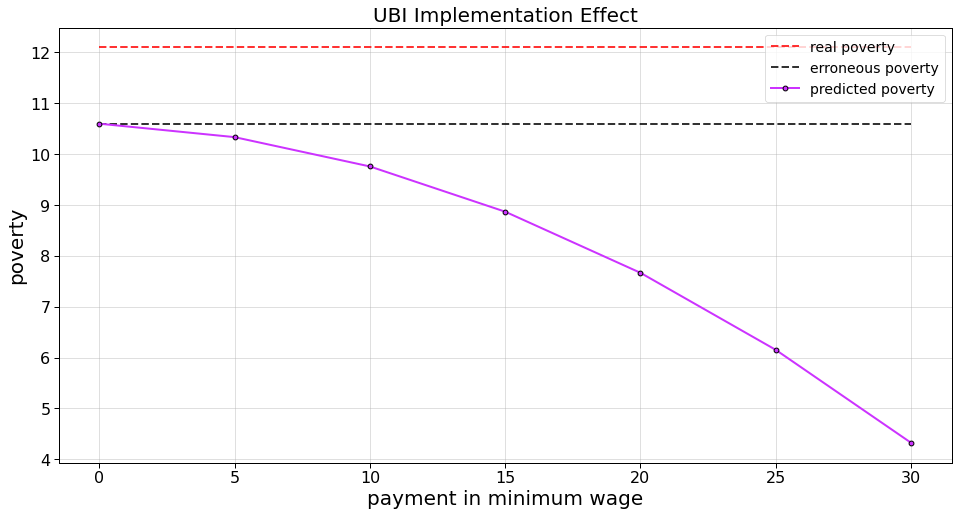

In [22]:
plotter.plot_UBI_implementation_effect(features_table=data['Russia']['features'].iloc[[-1]],
                                       target=data['Russia']['target'].iloc[[-1]],
                                       predictor=Predictor(regressor=regressors['Alaska']),
                                       payment_in_minimum_wage_list=np.linspace(0, 30, 7),
                                       color=get_colors(COLORS_DICT, color_names=['Russia'])[0],
                                       save=False)